In [1]:
import uproot as ur
from math import trunc
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import matplotlib as mpl
import mplhep as hep
from matplotlib.colors import LogNorm
plt.style.use(hep.style.CMS)

In [2]:
file = ur.open('Kin.djangoh.NC.Rad.20x250_evt.root:data;1')
print(file)

<TTree 'data' (17 branches) at 0x7fe134108f90>


In [3]:
file.keys()

['electronX',
 'electronY',
 'electronQ2',
 'hadronX',
 'hadronY',
 'hadronQ2',
 'DoubleAngleX',
 'DoubleAngleY',
 'DoubleAngleQ2',
 'ISigmaX',
 'ISigmaY',
 'ISigmaQ2',
 'TrueX',
 'TrueY',
 'TrueQ2',
 'sigma',
 'evtChannel']

In [4]:
qed = file.arrays(['electronX','electronY','electronQ2','hadronX','hadronY','hadronQ2','DoubleAngleX','DoubleAngleY','DoubleAngleQ2','ISigmaX','ISigmaY','ISigmaQ2','TrueX','TrueY','TrueQ2','evtChannel'],library='pd')

In [5]:
qed.head()

,electronX,electronY,electronQ2,hadronX,hadronY,hadronQ2,DoubleAngleX,DoubleAngleY,DoubleAngleQ2,ISigmaX,ISigmaY,ISigmaQ2,TrueX,TrueY,TrueQ2,evtChannel
0,0.001175,0.101118,2.376652,0.001175,0.101162,2.376773,0.001175,0.101157,2.376550,0.001175,0.101157,2.376759,0.001175,0.101118,2.376656,1
1,0.003766,0.019158,1.442890,0.003757,0.019201,1.442954,0.003757,0.019201,1.442827,0.003757,0.019201,1.442954,0.003766,0.019158,1.442891,1
2,0.002043,0.026046,1.064057,0.002052,0.026131,1.072553,0.002044,0.026029,1.064076,0.002036,0.026129,1.064147,0.003068,0.017499,1.073873,7
3,0.002475,0.174806,8.654171,0.010148,0.036593,7.427180,0.011837,0.042422,10.042539,0.010191,0.042462,7.458053,0.010222,0.036549,7.471677,6
4,0.002101,0.044787,1.881828,0.048878,0.001922,1.878702,0.050004,0.001966,1.966190,0.046861,0.002008,1.801164,0.048717,0.001833,1.786001,6


In [6]:
noraddf = qed[qed.evtChannel==1]
raddf = qed[qed.evtChannel==0]

[[3.42100047e-07 8.59316465e-07 2.15850537e-06 5.42192035e-06
  1.36192482e-05 3.42100047e-05 8.59316465e-05 2.15850537e-04
  5.42192035e-04 1.36192482e-03 3.42100047e-03 8.59316465e-03
  2.15850537e-02 5.42192035e-02 1.36192482e-01]
 [8.59316465e-07 2.15850537e-06 5.42192035e-06 1.36192482e-05
  3.42100047e-05 8.59316465e-05 2.15850537e-04 5.42192035e-04
  1.36192482e-03 3.42100047e-03 8.59316465e-03 2.15850537e-02
  5.42192035e-02 1.36192482e-01 3.42100047e-01]
 [2.15850537e-06 5.42192035e-06 1.36192482e-05 3.42100047e-05
  8.59316465e-05 2.15850537e-04 5.42192035e-04 1.36192482e-03
  3.42100047e-03 8.59316465e-03 2.15850537e-02 5.42192035e-02
  1.36192482e-01 3.42100047e-01 8.59316465e-01]
 [5.42192035e-06 1.36192482e-05 3.42100047e-05 8.59316465e-05
  2.15850537e-04 5.42192035e-04 1.36192482e-03 3.42100047e-03
  8.59316465e-03 2.15850537e-02 5.42192035e-02 1.36192482e-01
  3.42100047e-01 8.59316465e-01 2.15850537e+00]
 [1.36192482e-05 3.42100047e-05 8.59316465e-05 2.15850537e-04
  

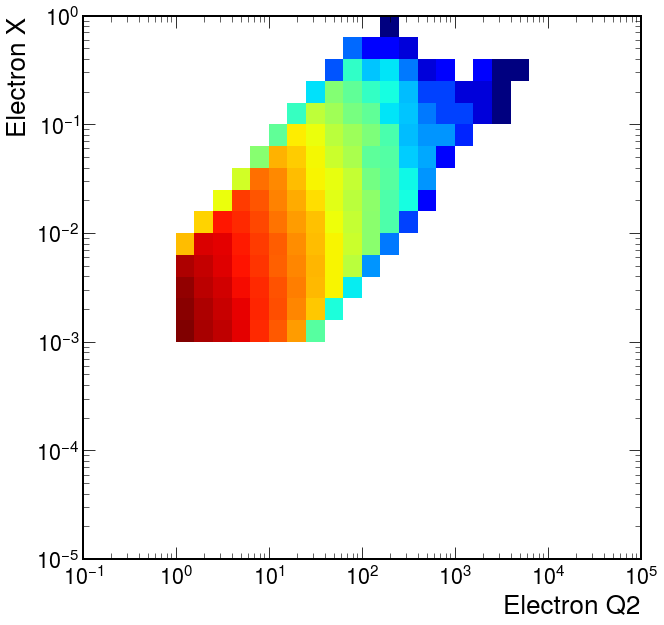

In [29]:
x_bins = np.logspace(-5,0,26)
Q2_bins = np.logspace(-1,5,31)
qedhist, xedgesqed, yedgesqed, imageqed = plt.hist2d(qed['electronQ2'],qed['electronX'],bins=[Q2_bins,x_bins],norm=mpl.colors.LogNorm(),cmap=plt.cm.jet)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Electron X")
plt.xlabel("Electron Q2")

x = 0
y = 0

areas = [ [0]*trunc(Q2_bins.size / 2) for i in range(trunc(x_bins.size / 2))]


for i in range(trunc(x_bins.size / 2)):
    y = 0
    for j in range(trunc(Q2_bins.size / 2)):
        area = (x_bins[x+1] - x_bins[x])*(Q2_bins[y+1] - Q2_bins[y])
        areas[i][j] = area
        y = y+2
    x = x+2
    
areaHist = np.array(areas)

Text(1, 0, 'Electron Q2')

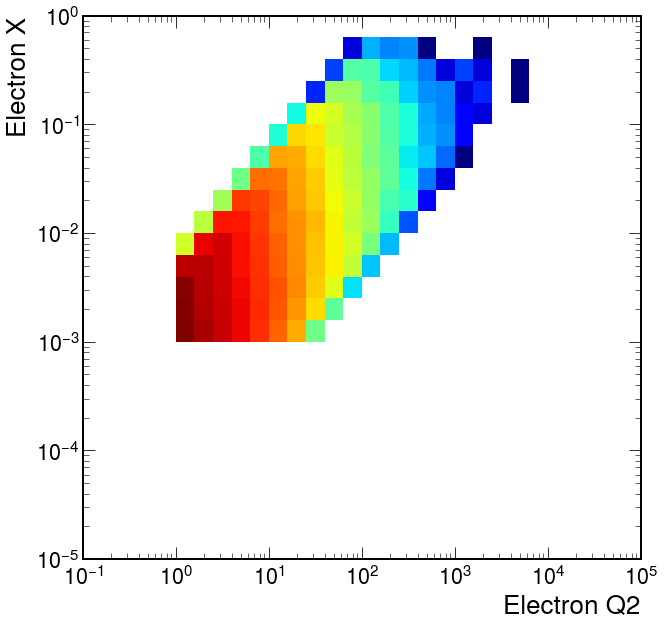

In [8]:
file = ur.open('Kin.djangoh.NC.20x250_evt.root:data;1')
noqed = file.arrays(['electronX','electronY','electronQ2','hadronX','hadronY','hadronQ2','DoubleAngleX','DoubleAngleY','DoubleAngleQ2','ISigmaX','ISigmaY','ISigmaQ2','TrueX','TrueY','TrueQ2','evtChannel'],library='pd')
x_bins = np.logspace(-5,0,26)
Q2_bins = np.logspace(-1,5,31)
noqedhist, xedgesnoqed, yedgesnoqed, imagenoqed = plt.hist2d(noqed['electronQ2'],noqed['electronX'],bins=[Q2_bins,x_bins],norm=mpl.colors.LogNorm(),cmap=plt.cm.jet)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Electron X")
plt.xlabel("Electron Q2")




/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'QED on / QED off')

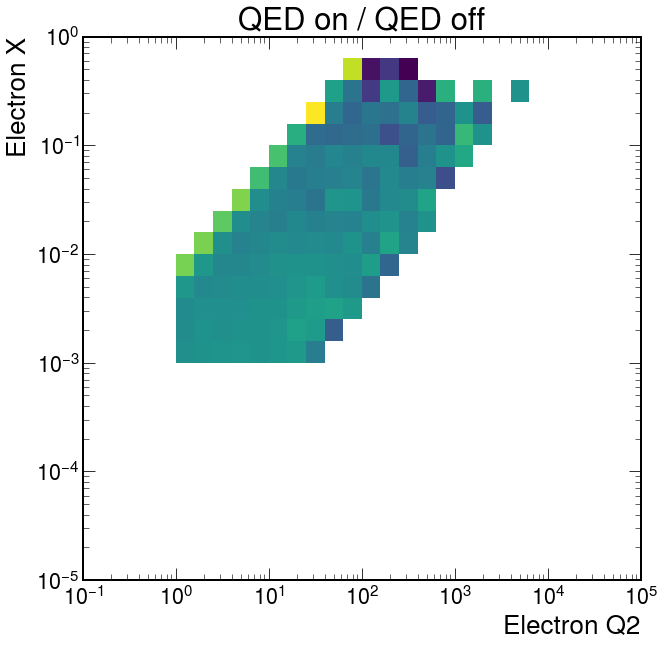

In [54]:
ratio = np.divide(qedhist,noqedhist)
X,Y = np.meshgrid(xedgesqed,yedgesqed)
im = plt.pcolormesh(np.transpose(X),np.transpose(Y),ratio,norm=mpl.colors.LogNorm())
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Electron X")
plt.xlabel("Electron Q2")
plt.title("QED on / QED off")


#locs, labels = plt.xticks()
#labels = Q2_bins
#plt.xticks(locs, labels)

In [30]:
qedhist.shape

(30, 25)

In [28]:
ratio.shape

(30, 25)

In [38]:
xedgesqed.shape

(31,)